In [549]:
import numpy as np
import os 
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt

In [550]:
Data = pd.read_csv('Data.csv')
Fs = 2000 #Sampling Frequency [Hz]
Ts = 1/Fs #Sampling Time [s]

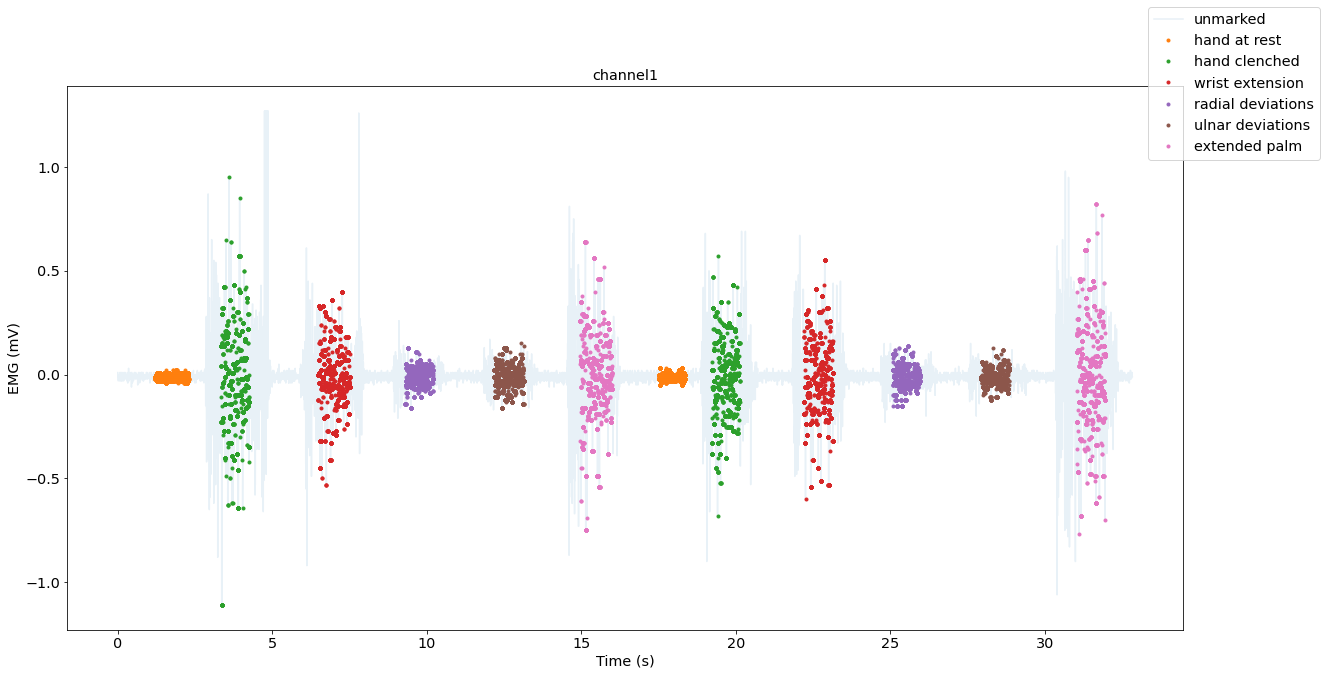

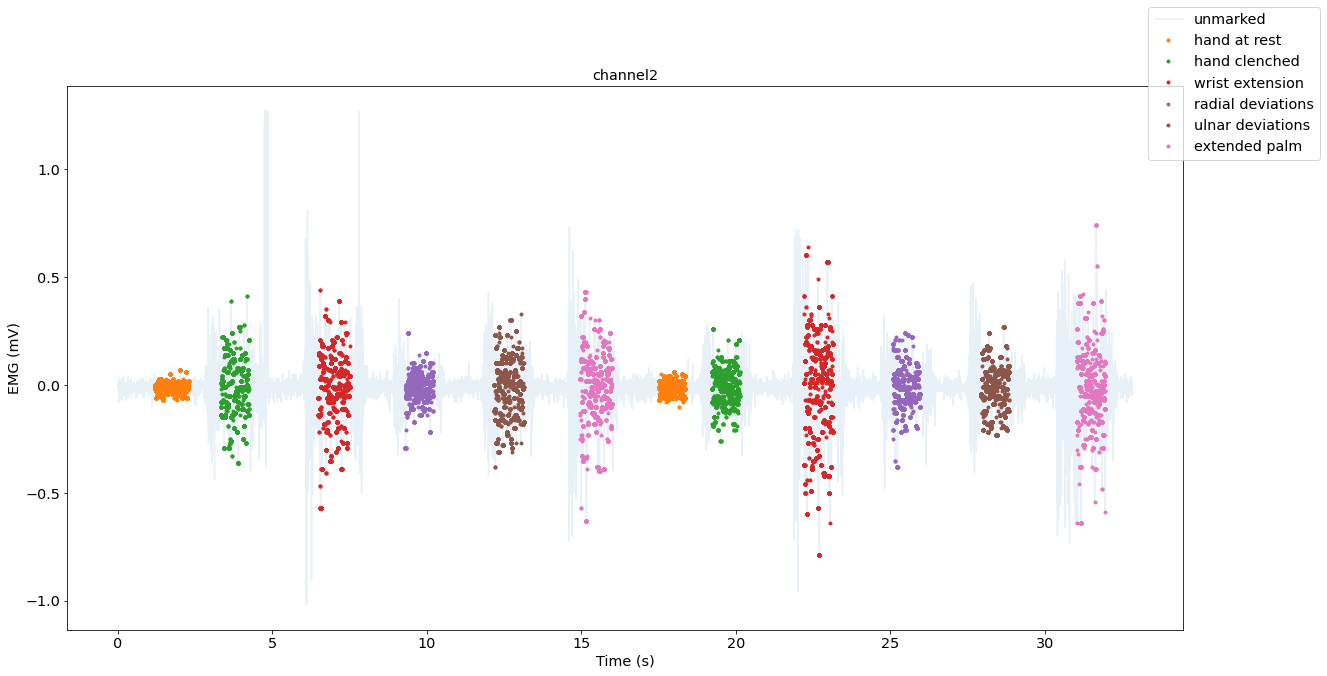

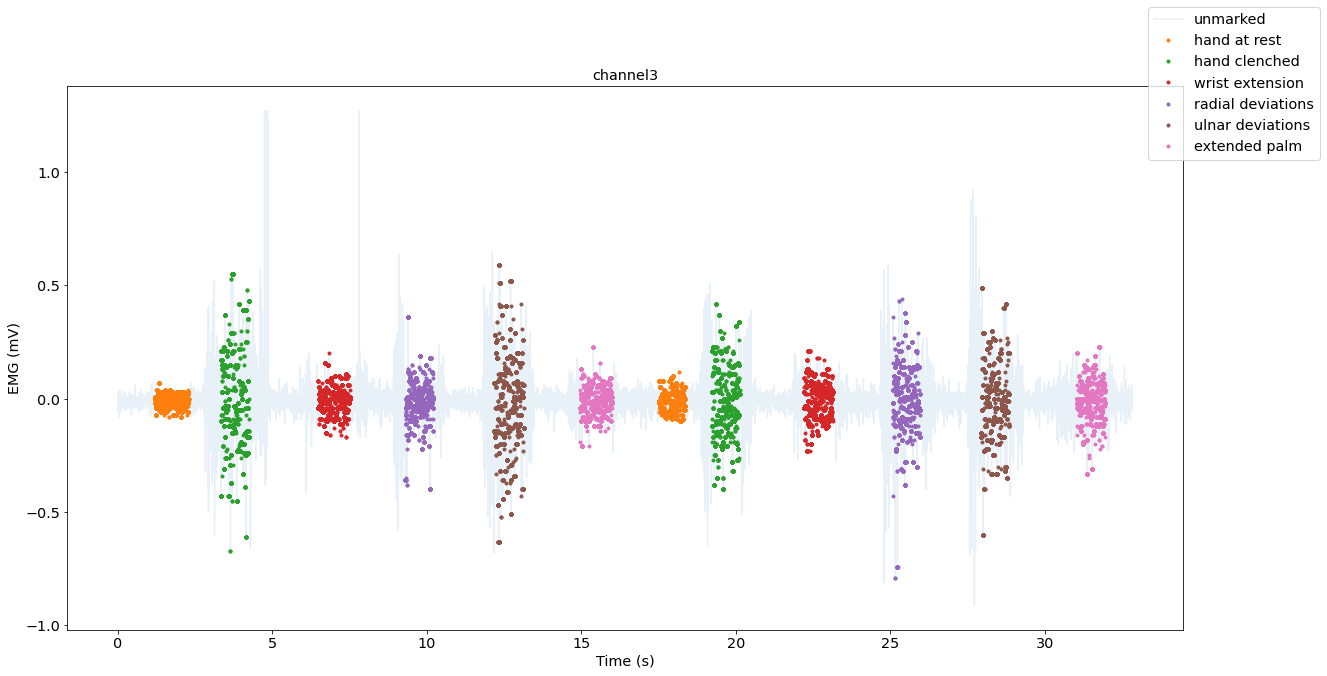

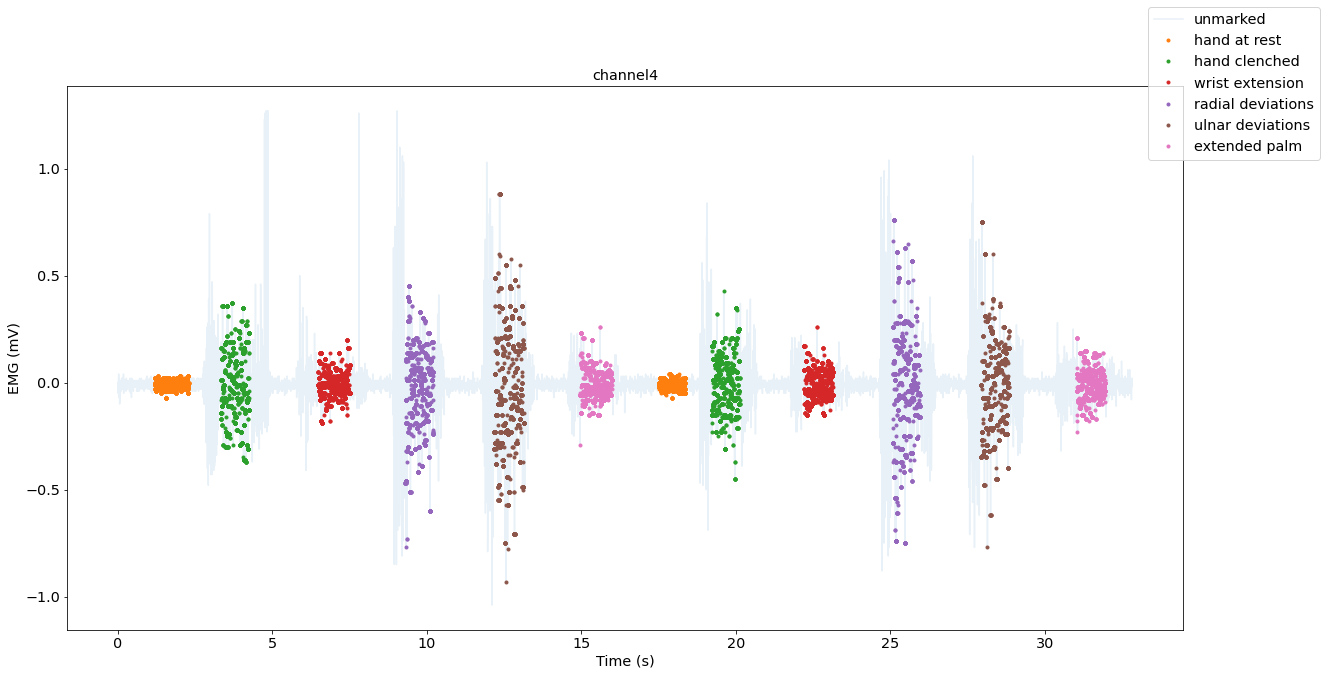

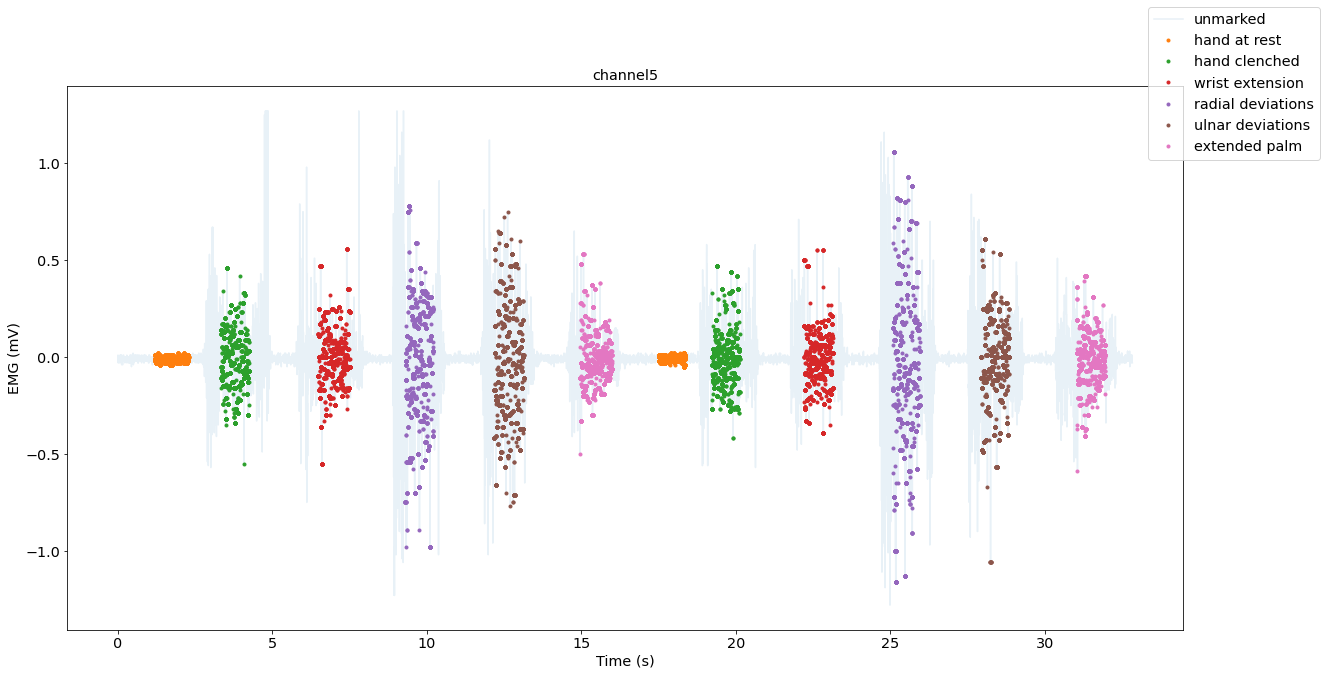

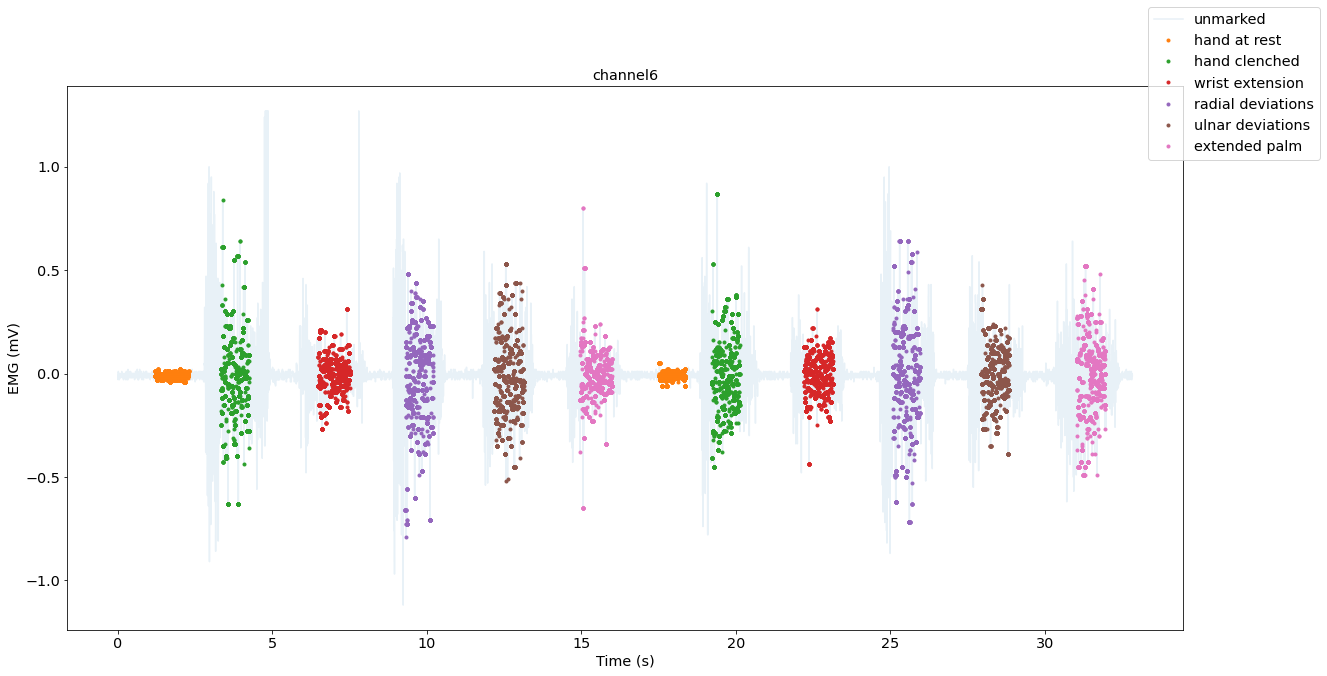

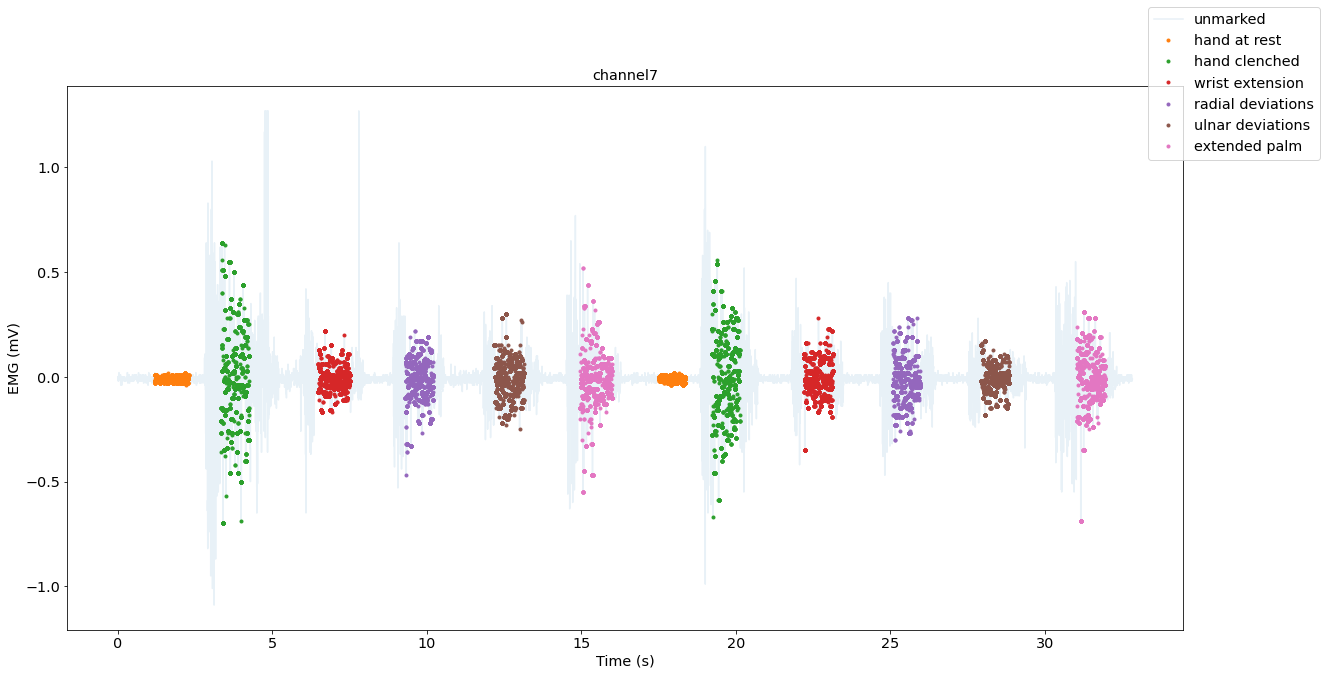

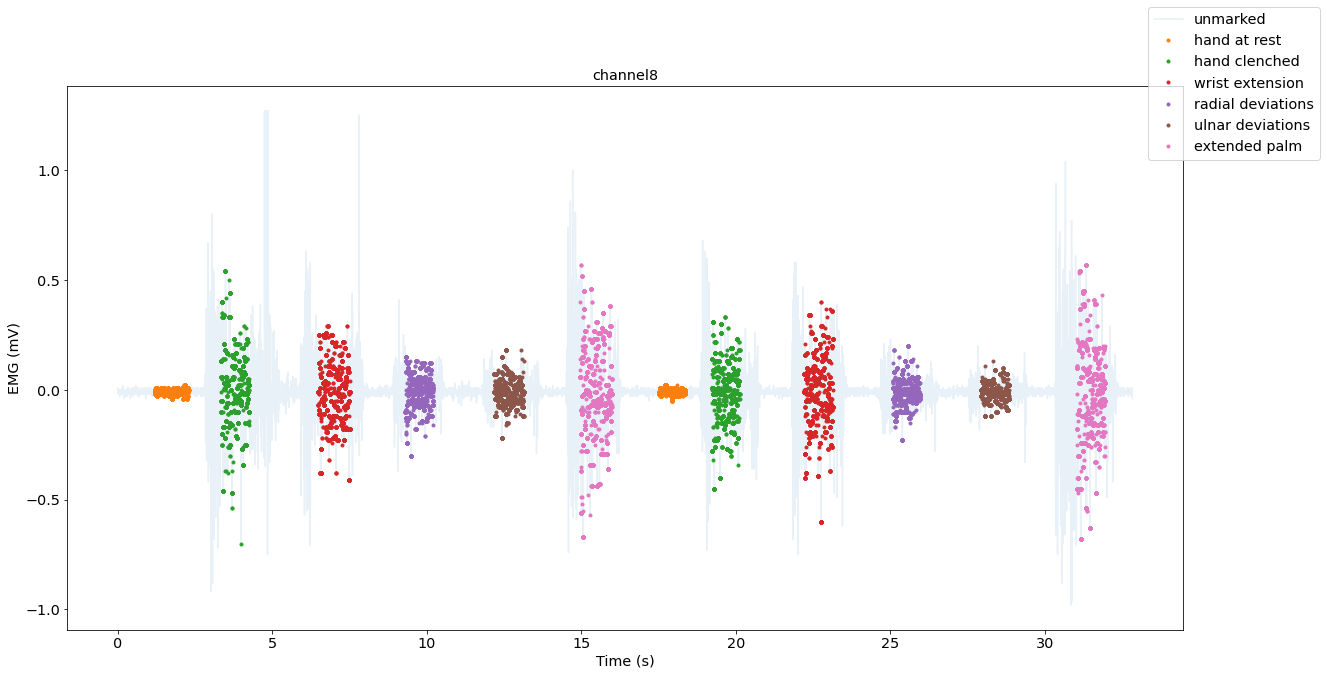

In [551]:
###################################################
"""Plotting before Preprocessing"""
###################################################
data = Data[Data['Subject']==1]

classes = list(['unmarked', 'hand at rest', 'hand clenched', 'wrist extension', 'radial deviations', 'ulnar deviations', 'extended palm'])

channels = list(['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7','channel8'])

for channel_num in channels:
    fig, ax = plt.subplots(figsize=(20,10))

    time = data['time'].values * (1/2000)
    channel = data[channel_num].values * (1000)
    ax.plot(time, channel, label = classes[0], alpha = 0.10)
    for i in data['class'].unique():
        if i > 0:
            time = data[data['class']==i]['time'].values * (1/2000)
            channel = data[data['class']==i][channel_num].values * (1000)
            ax.plot(time, channel, '.', label = classes[int(i)])

    fig.legend();
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('EMG (mV)')
    ax.set_title(channel_num)


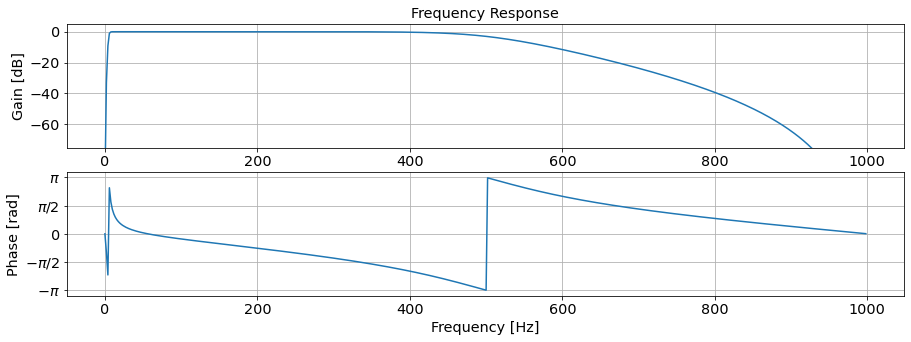

In [552]:
###################################################
"""Creating Filter"""
###################################################
from scipy.signal import butter, filtfilt, freqz, sosfreqz, sosfilt

low_Cutoff_freq = 5 #Hz
high_Cutoff_freq = 500 #Hz
Order = 4
sos = butter(Order, (low_Cutoff_freq, high_Cutoff_freq), 'bp', fs=Fs, output='sos')

#Plotting Filter
w, h = sosfreqz(sos)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))
w = w*(Fs/2) #Converts Frequency from normalized to the true values

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(w/np.pi, db)
plt.ylim(-75, 5)
plt.grid(True)
plt.yticks([0, -20, -40, -60])
plt.ylabel('Gain [dB]')
plt.title('Frequency Response')
plt.subplot(2, 1, 2)
plt.plot(w/np.pi, np.angle(h))
plt.grid(True)
plt.yticks([-np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi],
           [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'])
plt.ylabel('Phase [rad]')
plt.xlabel('Frequency [Hz]')
plt.show()


In [553]:
###################################################
"""Signal Preprocessing"""
###################################################
Filtered_Data = Data.copy()
for subject_num in Filtered_Data['Subject'].unique():
    #For loop to run process for each Subject data
    for channel_num in channels:
        #For loop to run process for each channel of Subject data
        time = Filtered_Data[Filtered_Data['Subject']==subject_num]['time'].values * Ts
        Channel_data = Filtered_Data[Filtered_Data['Subject']==subject_num][channel_num].values
        Channel_loc = Data['Subject']==subject_num
        Filtered_Data.loc[Channel_loc, channel_num] = sosfilt(sos, Channel_data)
        


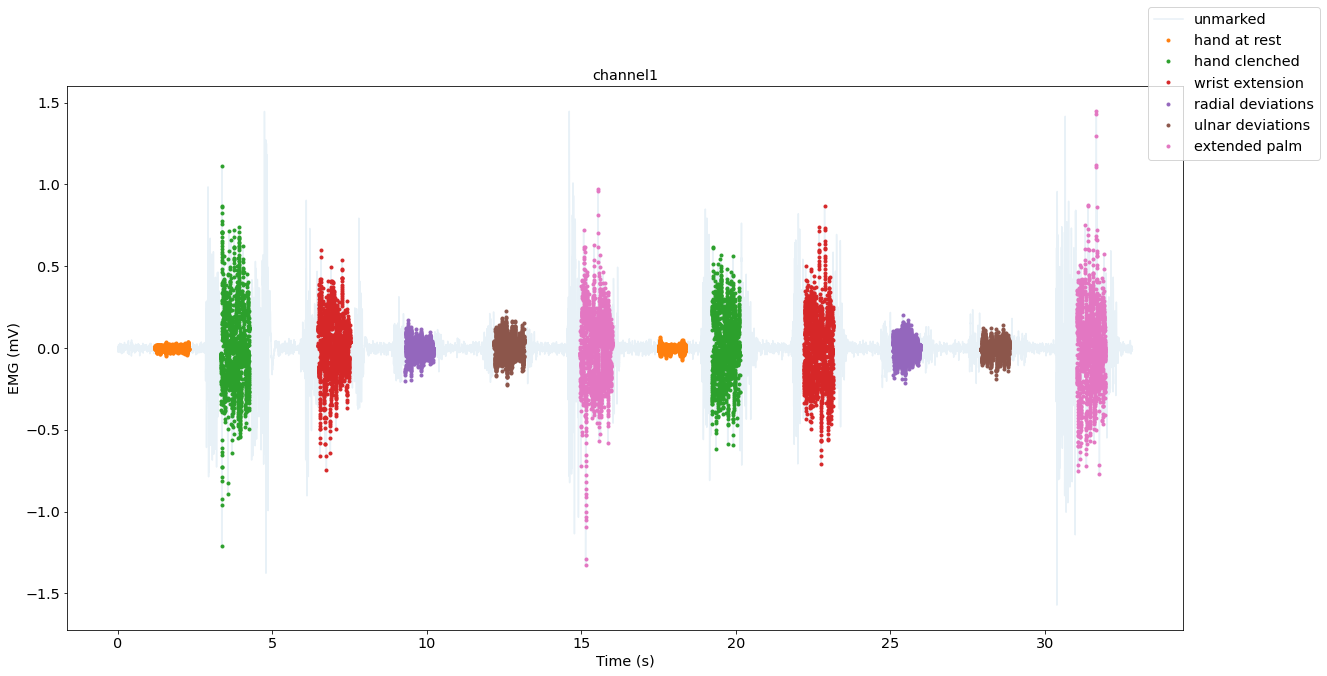

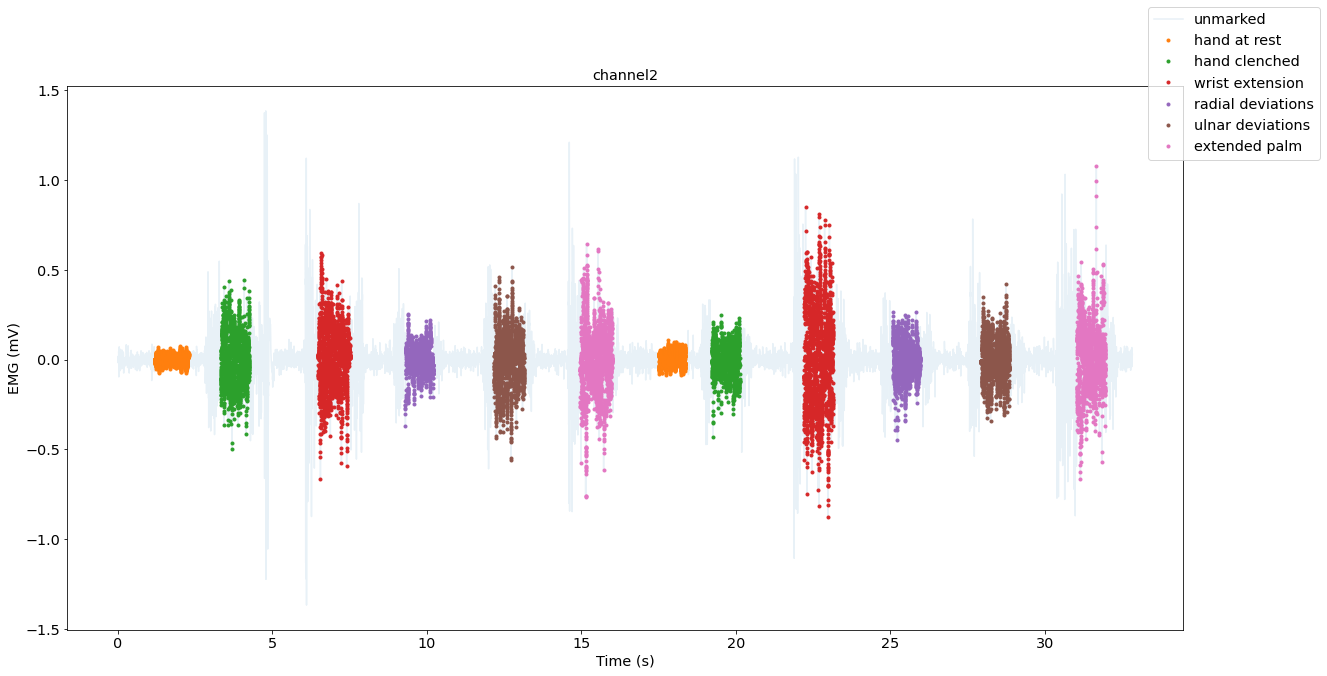

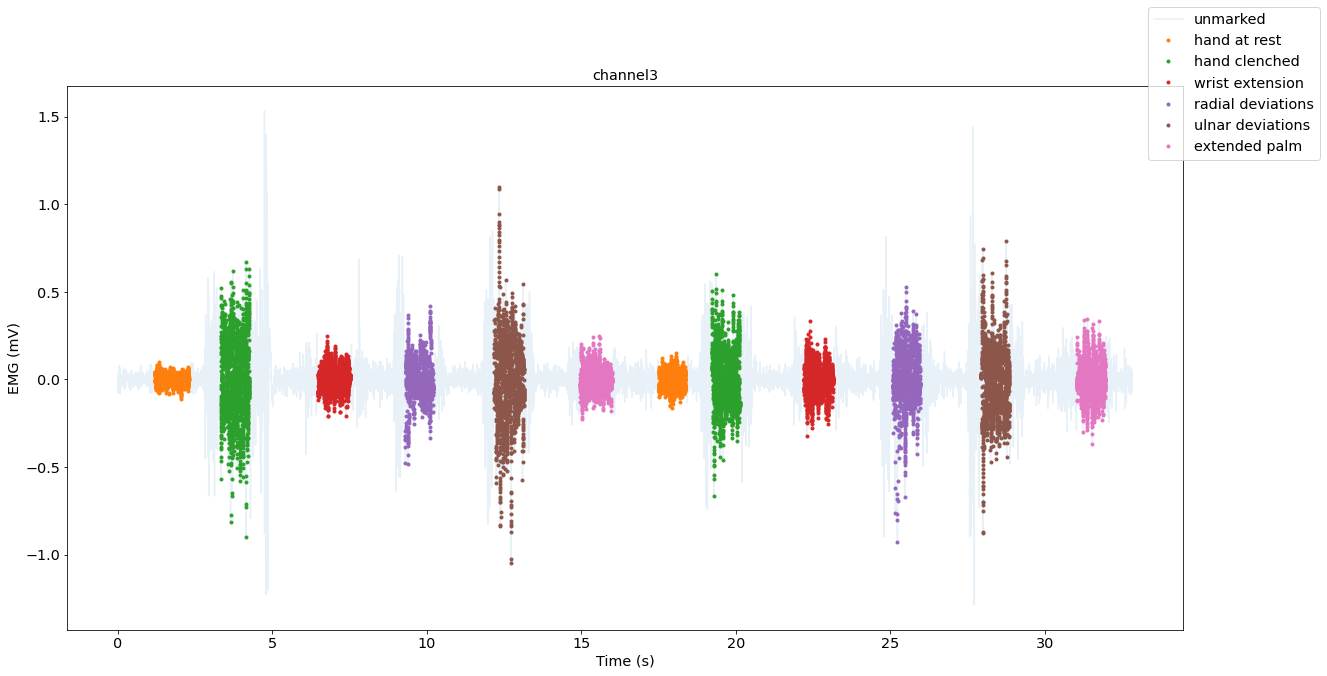

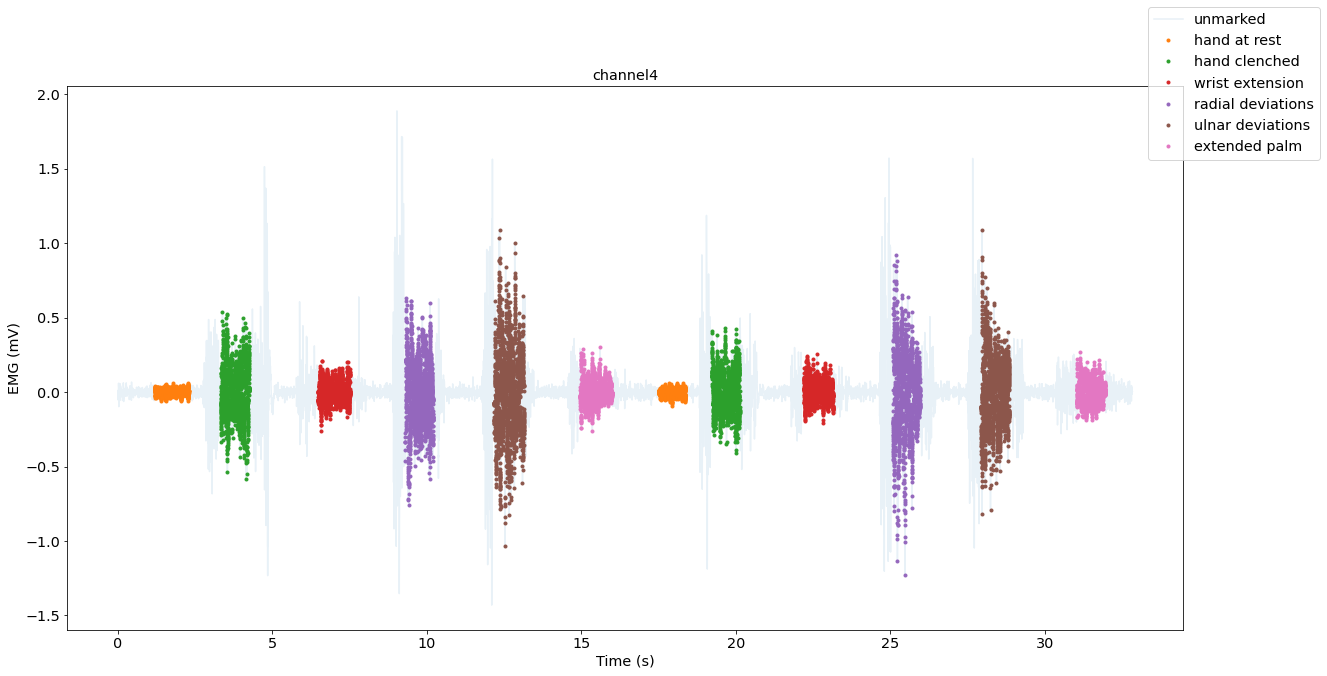

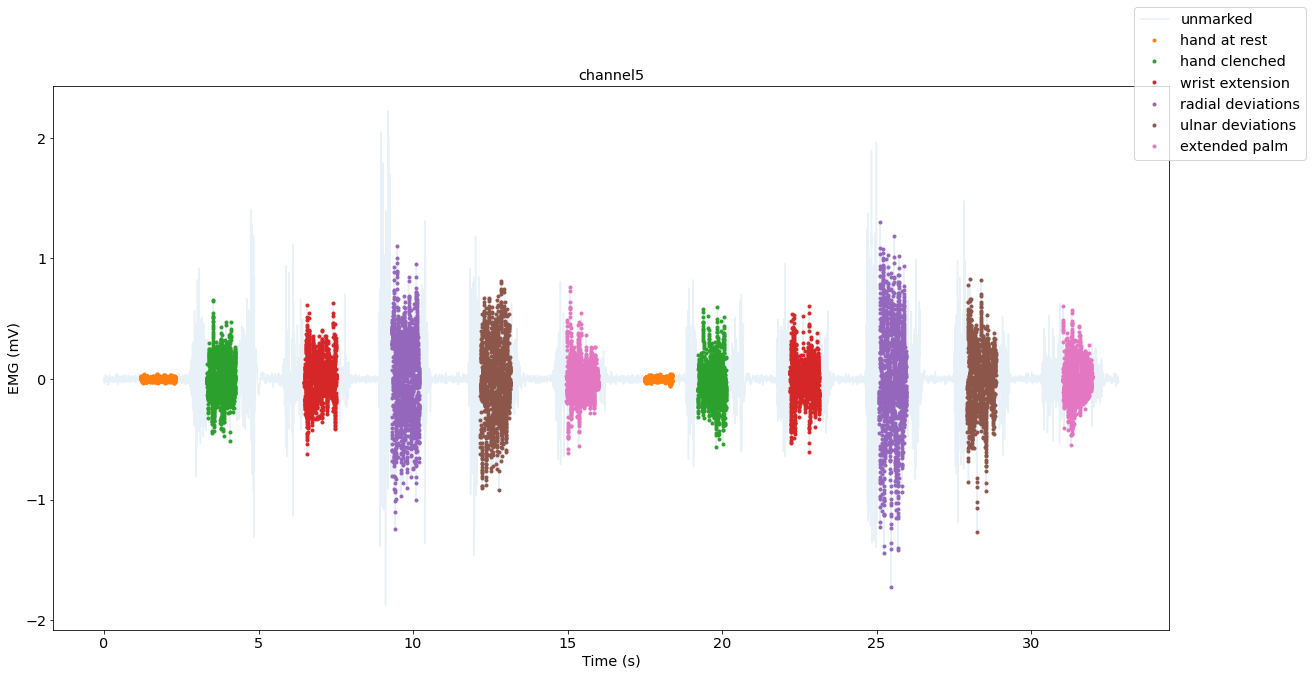

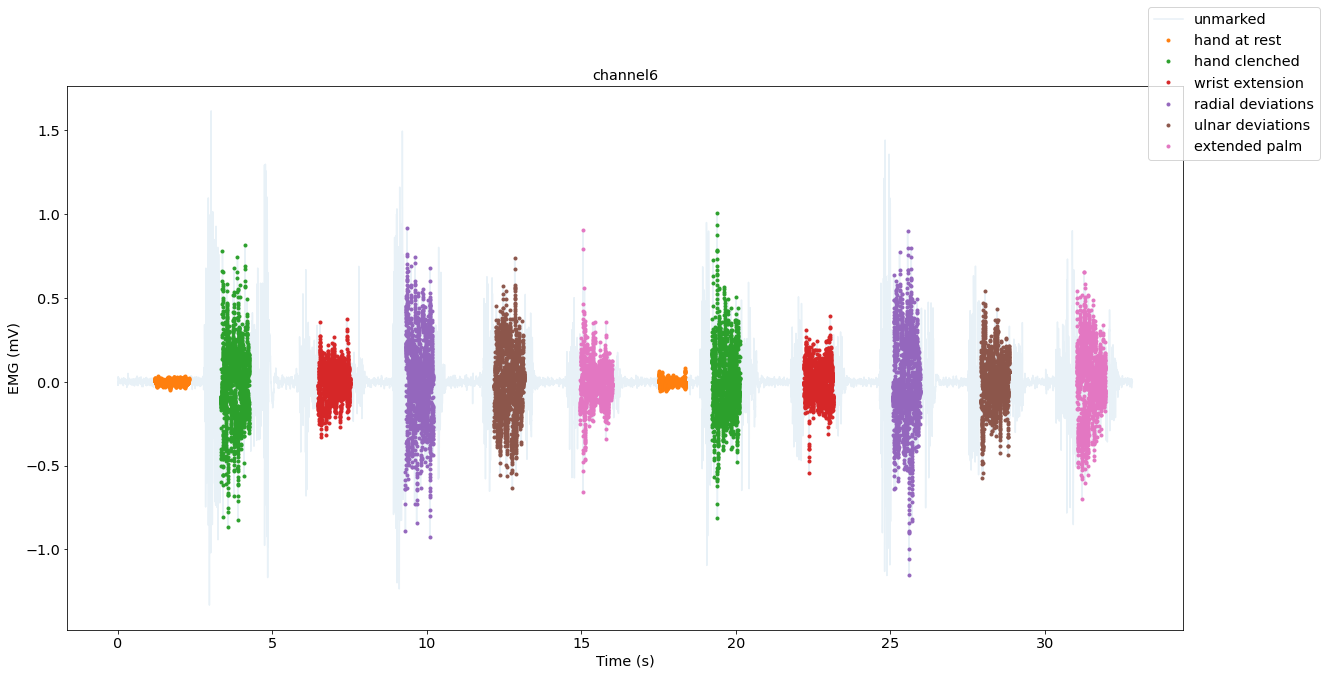

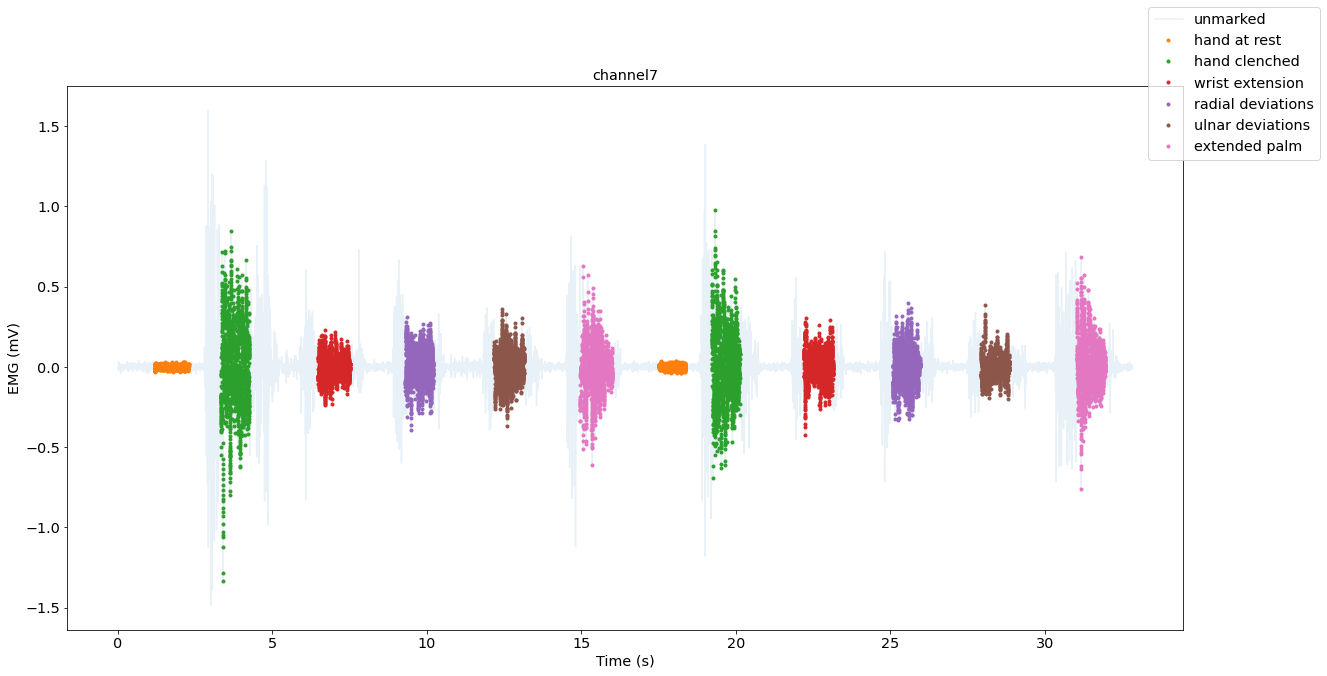

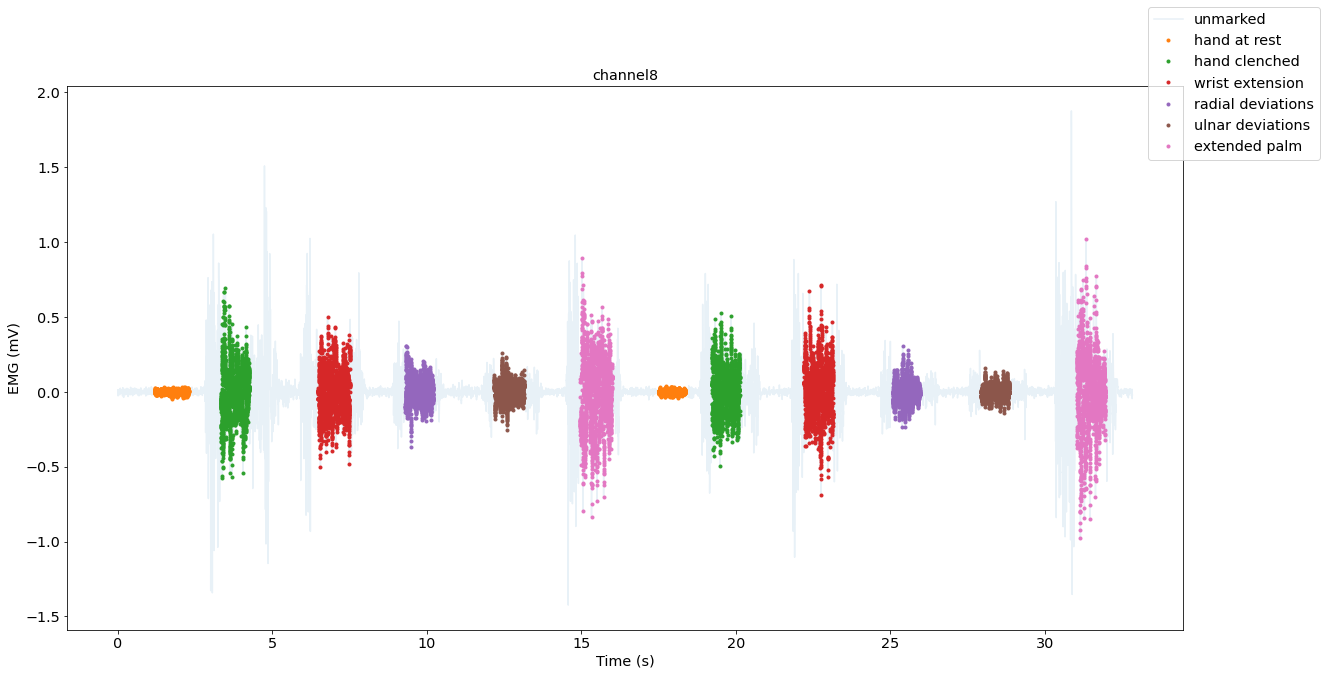

In [554]:
###################################################
"""Plotting after Preprocessing"""
###################################################
data = Filtered_Data[Filtered_Data['Subject']==1]

classes = list(['unmarked', 'hand at rest', 'hand clenched', 'wrist extension', 'radial deviations', 'ulnar deviations', 'extended palm'])

channels = list(['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7','channel8'])

for channel_num in channels:
    fig, ax = plt.subplots(figsize=(20,10))

    time = data['time'].values * (1/2000)
    channel = data[channel_num].values * (1000)
    ax.plot(time, channel, label = classes[0], alpha = 0.10)
    for i in data['class'].unique():
        if i > 0:
            time = data[data['class']==i]['time'].values * (1/2000)
            channel = data[data['class']==i][channel_num].values * (1000)
            ax.plot(time, channel, '.', label = classes[int(i)])

    fig.legend();
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('EMG (mV)')
    ax.set_title(channel_num)


In [555]:
Filtered_Data.drop('Unnamed: 0',inplace=True,axis=1)
Filtered_Data.drop('time',inplace=True,axis=1)

Filtered_Marked_Data = Filtered_Data[(Filtered_Data['class'] != 0)]

Subjects_data = Filtered_Marked_Data.groupby(['Subject','class'])
Subjects_data.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,Subject
2287,0.000012,0.000001,0.000041,2.031221e-05,0.000014,0.000009,-0.000005,0.000022,1.0,1
2288,0.000008,-0.000002,0.000034,2.267337e-05,0.000017,0.000012,-0.000016,0.000023,1.0,1
2289,0.000008,-0.000013,0.000033,1.520361e-05,0.000009,0.000011,-0.000020,0.000008,1.0,1
2290,0.000010,-0.000023,0.000040,7.678031e-06,0.000002,0.000009,-0.000025,-0.000010,1.0,1
2291,0.000010,-0.000024,0.000042,6.956600e-06,0.000001,0.000009,-0.000029,-0.000014,1.0,1
...,...,...,...,...,...,...,...,...,...,...
4210877,-0.000157,0.000126,0.000074,9.187551e-06,-0.000089,-0.000171,0.000378,-0.000058,6.0,72
4210878,-0.000205,0.000134,0.000072,5.585019e-07,-0.000111,-0.000214,0.000418,-0.000159,6.0,72
4210879,-0.000158,0.000127,0.000066,4.779250e-06,-0.000090,-0.000174,0.000364,-0.000075,6.0,72
4210880,-0.000127,0.000115,0.000064,9.116372e-06,-0.000074,-0.000142,0.000329,-0.000011,6.0,72


In [556]:
###################################################
"""Feature Extraction"""
###################################################
def MAV(data):
    return np.mean(np.abs(data))

Features_MAV = Subjects_data.agg([MAV])
Features_MAV = Features_MAV.reset_index()

In [557]:
Features_MAV

,Subject,class,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
,,,MAV,MAV,MAV,MAV,MAV,MAV,MAV,MAV
0,1,1.0,0.000011,0.000020,0.000027,0.000014,0.000009,0.000009,0.000009,0.000009
1,1,2.0,0.000155,0.000082,0.000145,0.000115,0.000116,0.000154,0.000178,0.000117
2,1,3.0,0.000135,0.000165,0.000053,0.000048,0.000109,0.000072,0.000057,0.000116
3,1,4.0,0.000038,0.000061,0.000086,0.000180,0.000301,0.000195,0.000082,0.000054
4,1,5.0,0.000037,0.000090,0.000149,0.000195,0.000196,0.000125,0.000061,0.000037
...,...,...,...,...,...,...,...,...,...,...
431,72,2.0,0.000269,0.000049,0.000070,0.000113,0.000109,0.000086,0.000132,0.000141
432,72,3.0,0.000122,0.000073,0.000024,0.000019,0.000046,0.000026,0.000045,0.000073
433,72,4.0,0.000042,0.000058,0.000098,0.000230,0.000401,0.000146,0.000072,0.000048


In [558]:
def WL(data):
    WL = 0
    for i in range(0,len(data)):
        if i+1 < len(data):
            WL_i = data.iloc[i+1]-data.iloc[i]
            WL = WL + abs(WL_i)
    return WL

Features_WL = Subjects_data.agg([WL])
Features_WL = Features_WL.reset_index()

In [559]:
Features_WL

,Subject,class,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
,,,WL,WL,WL,WL,WL,WL,WL,WL
0,1,1.0,0.008353,0.015628,0.022314,0.011972,0.007841,0.007225,0.007174,0.007279
1,1,2.0,0.118923,0.061843,0.113582,0.087686,0.085810,0.106307,0.123401,0.089026
2,1,3.0,0.101197,0.125977,0.043968,0.038112,0.085401,0.056516,0.043078,0.088690
3,1,4.0,0.026797,0.044439,0.068035,0.128701,0.202501,0.131823,0.057877,0.037495
4,1,5.0,0.027623,0.064541,0.103741,0.142693,0.144077,0.089532,0.043824,0.027091
...,...,...,...,...,...,...,...,...,...,...
431,72,2.0,0.181180,0.032842,0.044165,0.073121,0.068419,0.058068,0.084701,0.088940
432,72,3.0,0.082452,0.045537,0.015299,0.012569,0.032758,0.017595,0.028082,0.044096
433,72,4.0,0.022053,0.030010,0.053193,0.124502,0.207869,0.082532,0.040082,0.025574


In [560]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [561]:
scaler = StandardScaler()
model1 = SVC()

accuracy1 = []
f1score1 = []

for i in range(1,72):
    DataTrain1 = Features_MAV[Features_MAV['Subject']!=i]
    DataTest1 = Features_MAV[Features_MAV['Subject']==i]
    
    X_train1 = DataTrain1.iloc[:,2:].values
    y_train1 = DataTrain1['class'].values
    
    X_test1 = DataTest1.iloc[:,2:].values
    y_test1 = DataTest1['class'].values

    scaler.fit(X_train1)
    X_train_norm1 = scaler.transform(X_train1)
    X_test_norm1 = scaler.transform(X_test1)
    
    model1.fit(X_train_norm1, y_train1)
    
    y_pred1 = model1.predict(X_test_norm1)
    accuracy1.append(accuracy_score(y_test1, y_pred1))
    f1score1.append(f1_score(y_test1, y_pred1, average='macro'))
    
print(f'Average accuracy = {np.mean(np.array(accuracy1))*100} %')


Average accuracy = 88.02816901408451 %


In [562]:
scaler = StandardScaler()
model2 = SVC()

accuracy2 = []
f1score2 = []

for i in range(1,72):
    DataTrain2 = Features_WL[Features_WL['Subject']!=i]
    DataTest2 = Features_WL[Features_WL['Subject']==i]
    
    X_train2 = DataTrain2.iloc[:,2:].values
    y_train2 = DataTrain2['class'].values
    
    X_test2 = DataTest2.iloc[:,2:].values
    y_test2 = DataTest2['class'].values

    scaler.fit(X_train2)
    X_train_norm2 = scaler.transform(X_train2)
    X_test_norm2 = scaler.transform(X_test2)
    
    model2.fit(X_train_norm2, y_train2)
    
    y_pred2 = model2.predict(X_test_norm2)
    accuracy2.append(accuracy_score(y_test2, y_pred2))
    f1score2.append(f1_score(y_test2, y_pred2, average='macro'))
    
print(f'Average accuracy = {np.mean(np.array(accuracy2))*100} %')


Average accuracy = 86.3849765258216 %
